In [267]:
import sklearn 
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from mpl_toolkits import mplot3d
from sklearn.metrics import pairwise_distances_argmin
#you can use Python’s imaging library (PIL)
from PIL import Image
from IPython.display import display
# or you can use opencv ## conda install -c conda-forge opencv
#import cv2

import scipy.cluster.hierarchy as sch #you only for sch.dendrogram
import heapq

# K Means Implementation

In [3]:
#Synthetic Data Generation 
from sklearn.datasets import make_blobs
import random

# Set the parameters
n_samples = 300  # Total number of instances
n_centers = 4     # Number of centers
std_dev = 0.6     # Standard deviation

# Generate synthetic data
X, y = make_blobs(n_samples=n_samples, centers=n_centers, cluster_std=std_dev, random_state=42)

print(X.shape) #means 300 datapoints, 2 dimensions in terms of coordinates 
print(y.shape) #means 300 datapoints, the cluster that they actually belong to.
#though the labels are not needed for clustering 

(300, 2)
(300,)


In [206]:
def k_means(X, k, seed = None, epsilon = 0.001, plot=False, plusplus = False, iteration = 100): #X being the dataset, k being the number of centroids 
    #iterations are not determined. only iterate until you are unable to detect any changes 
    
    #default seed means not using a seed. 
    #rng should give different values for each time we run 
    if (seed != None):
        random.seed(seed)
        
    #axis = 0 means performing calculations along the first dimension
    #in this case, it would be the 300 data points that we have 
    #since we have 2 columns for each datapoint, then we get an array of 2 values 
    minval = X.min(axis=0)
    maxval = X.max(axis=0)
    
    #get our centroids and stuff 
    centroids = []
    if (plusplus == False):
        centroids = [[random.uniform(minval[i], maxval[i]) for i in range(len(minval))] for _ in range(k)] 
    else: #k means ++ algorithm 
        #first value is random 
        centroids = [[random.uniform(minval[i], maxval[i]) for i in range(len(minval))]]
        #then subsequent value is determined by 
        
        for i in range(k-1):
            #distance to the centroid they are closest to, for each pt 
            distances = [min(np.linalg.norm(centroid - pt) for centroid in centroids) for pt in X]
            
            location = max((val, j) for j, val in enumerate(distances))
            centroids.append(X[location[1]].tolist())

    assignment = [[] for _ in range(k)]
    
    #print("started with these centroids ", centroids)
    
    delta = float('inf')
    
    #stop training when our clusters stop deviating as much 
    round = 0 
    lastround = False
    
    while (delta > epsilon and round < iteration) or lastround: 
        
        #iteration through items:
        for i, pt in enumerate(X):
            
            #find the mean closesest to items through euclidean distance 
            distances = [np.linalg.norm(centroid - pt) for centroid in centroids]
            closest_index = np.argmin(distances)
            
            #assign item to mean 
            assignment[closest_index].append(i) #append the index of the pt into the list
            
        new_centroids = []
        
        #update mean to avg of the cluster 
        for i, selected_points in enumerate(assignment): #selected_points are represented as indices of those selected pts 
            # Calculate the mean of selected points
            if (len(selected_points) == 0):
                new_centroids.append(centroids[i])
            else:
                mean_of_points = np.mean(X[selected_points], axis=0) 
                new_centroids.append(mean_of_points)
                
        new_centroids = np.array(new_centroids)
            
        if plot: #every 10 I plot 
            print("Round #: ", round)
            plt.figure(figsize=(8, 6))

            # Plot data points with colors based on cluster assignments
            for i, cluster_points in enumerate(assignment):
                cluster_points = X[cluster_points]
                #cluster_points = np.array(cluster_points)
                x_col = [pt[0] for pt in cluster_points]
                y_col = [pt[1] for pt in cluster_points]
                plt.scatter(x_col, y_col, label=f'Cluster {i + 1}')

            # Plot centroids
            plt.scatter(np.array(centroids)[:, 0], np.array(centroids)[:, 1], c='purple', marker='x', label='Centroids')

            plt.title('K-Means Clustering')
            plt.xlabel('X-axis')
            plt.ylabel('Y-axis')
            plt.legend()
            plt.grid(True)
            plt.show()
        
        delta = sum(np.linalg.norm(centroids[i] - new_centroids[i]) for i in range(k))
        
        round += 1
        
        if lastround: #exit the loop at the last round 
            break
        
        if delta <= epsilon or round >= iteration - 1:
            print("Terminate after round: ", round)
            lastround = True
            
        centroids = new_centroids
        assignment = [[] for _ in range(k)] #clear your assignment 
        print("This is round ", round, " and my centroids are ", centroids)
         
    print("In total ran these many rounds: ", round)
    return (centroids, assignment)

### Fit and Plot with Default Seed 

Round #:  0


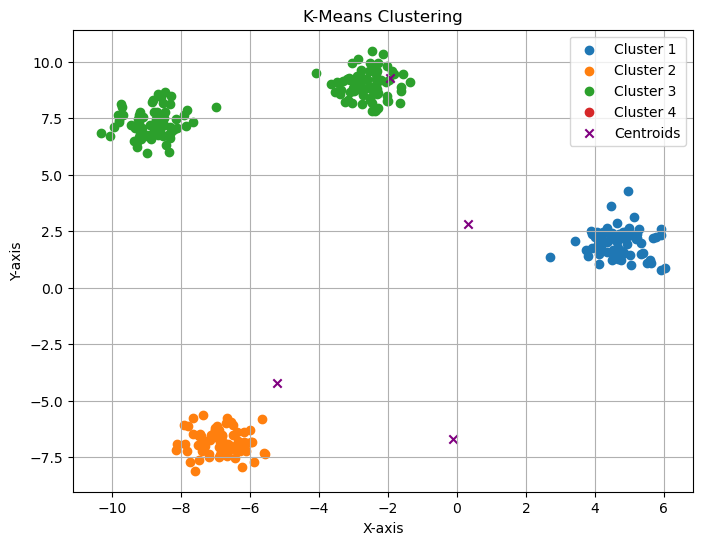

This is round  1  and my centroids are  [[ 4.68687447  2.01434593]
 [-6.85126211 -6.85031833]
 [-5.7198651   8.11855424]
 [-0.1309375  -6.70197756]]
Round #:  1


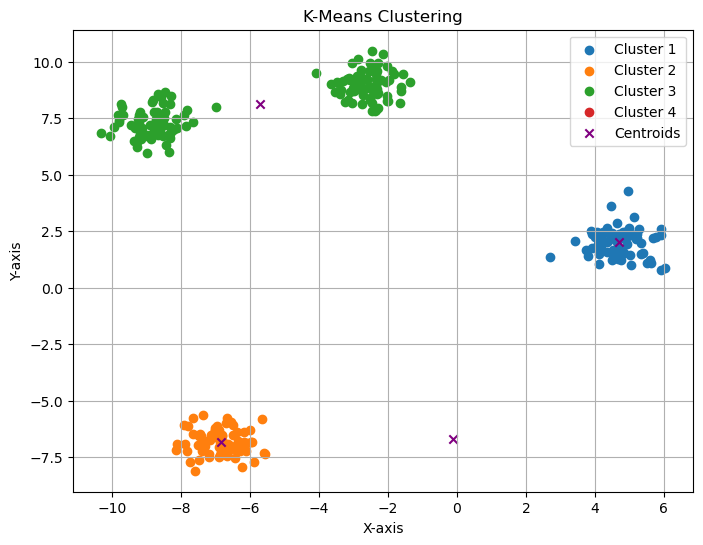

Terminate after round:  2
This is round  2  and my centroids are  [[ 4.68687447  2.01434593]
 [-6.85126211 -6.85031833]
 [-5.7198651   8.11855424]
 [-0.1309375  -6.70197756]]
Round #:  2


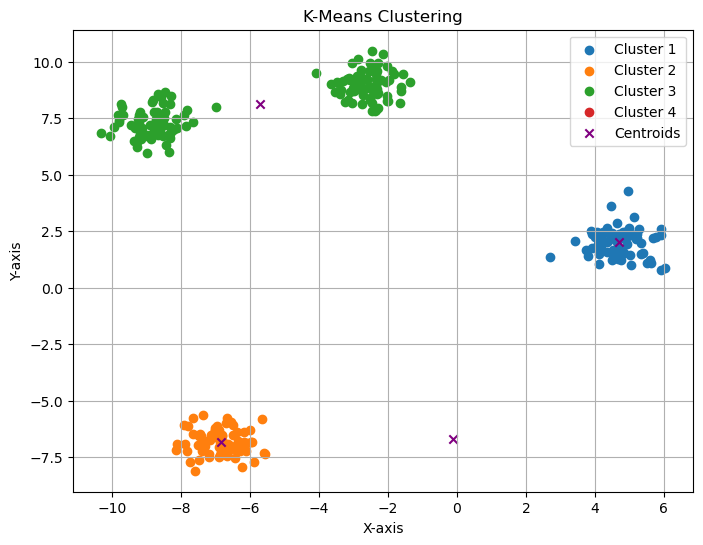

In total ran these many rounds:  3


(array([[ 4.68687447,  2.01434593],
        [-6.85126211, -6.85031833],
        [-5.7198651 ,  8.11855424],
        [-0.1309375 , -6.70197756]]),
 [[6,
   9,
   11,
   17,
   20,
   29,
   31,
   33,
   40,
   47,
   49,
   55,
   57,
   58,
   61,
   62,
   73,
   87,
   88,
   89,
   100,
   101,
   102,
   110,
   115,
   130,
   135,
   136,
   141,
   144,
   145,
   146,
   147,
   152,
   155,
   159,
   164,
   173,
   174,
   177,
   178,
   183,
   184,
   188,
   189,
   194,
   197,
   198,
   203,
   213,
   224,
   225,
   228,
   229,
   230,
   234,
   237,
   243,
   253,
   256,
   260,
   265,
   267,
   268,
   272,
   273,
   279,
   280,
   281,
   282,
   285,
   287,
   288,
   292,
   296],
  [3,
   5,
   7,
   22,
   27,
   28,
   37,
   39,
   43,
   50,
   52,
   54,
   64,
   65,
   66,
   67,
   68,
   70,
   71,
   76,
   77,
   79,
   84,
   96,
   108,
   117,
   119,
   120,
   121,
   124,
   129,
   139,
   142,
   148,
   153,
   156,
   162,
   166

In [207]:
k_means(X, 4, plot = True)

### Fit and Plot with Seed = 2 

Round #:  0


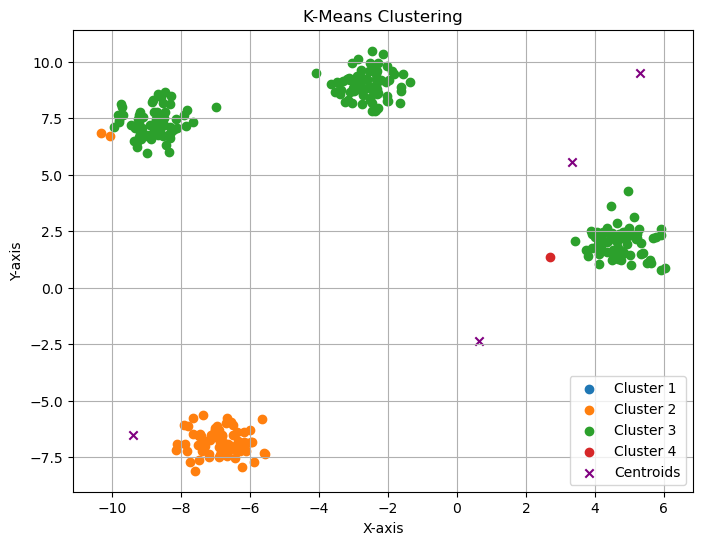

Round #:  1


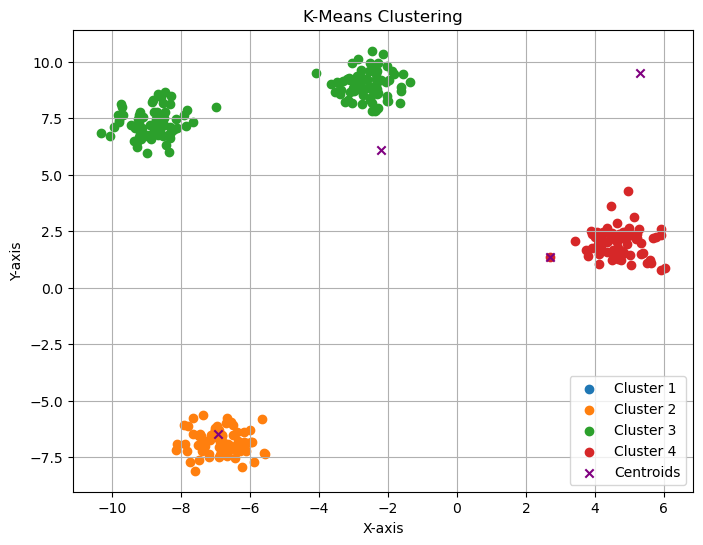

Round #:  2


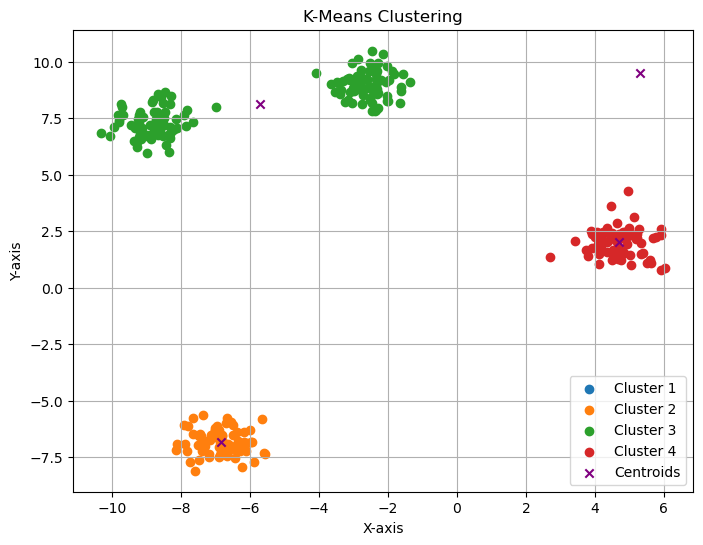

Terminate after round:  3
Round #:  3


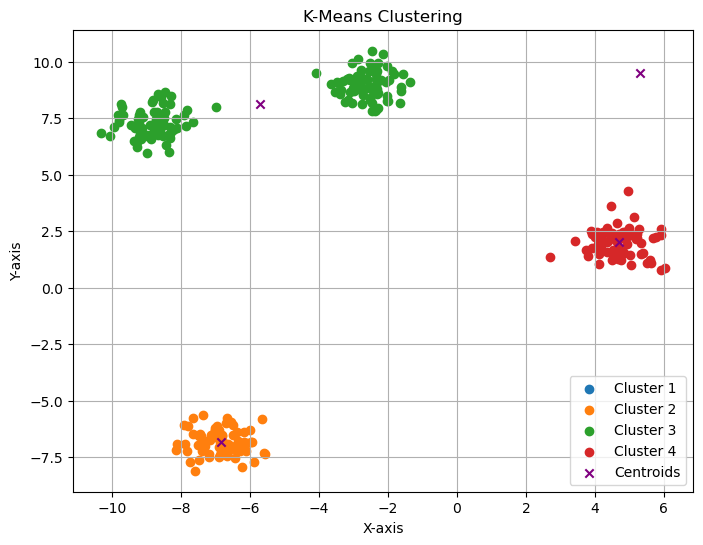

In total ran these many rounds:  4


(array([[ 5.30983483,  9.52203759],
        [-6.85126211, -6.85031833],
        [-5.7198651 ,  8.11855424],
        [ 4.68687447,  2.01434593]]),
 [[],
  [array([-7.01023591, -6.22084348]),
   array([-6.36503142, -6.97607271]),
   array([-6.63186832, -7.21834432]),
   array([-6.29455535, -6.96834402]),
   array([-7.3705596 , -5.62467723]),
   array([-6.88697525, -7.41846222]),
   array([-6.73264725, -7.1842755 ]),
   array([-6.67457361, -5.75440709]),
   array([-6.9483511 , -6.13741981]),
   array([-6.83414446, -7.28640662]),
   array([-6.65966824, -7.44403747]),
   array([-6.17204888, -6.8395985 ]),
   array([-7.02900568, -6.29716702]),
   array([-7.41867599, -6.58495809]),
   array([-7.31069372, -7.00817788]),
   array([-6.45265826, -7.55489485]),
   array([-7.90165665, -6.91343821]),
   array([-6.09633991, -6.86750729]),
   array([-6.2445725 , -7.93535329]),
   array([-8.12009245, -6.93358162]),
   array([-7.33510679, -6.78987332]),
   array([-6.17196312, -7.16161498]),
   array([-6

In [169]:
k_means(X, 4, seed = 2, plot = True)

# K Means ++

In [ ]:
#K Means ++ implementation achieved in the kmeans function. pass in true for plus plus

### Fit and Plot with Default Seed 

Round #:  0


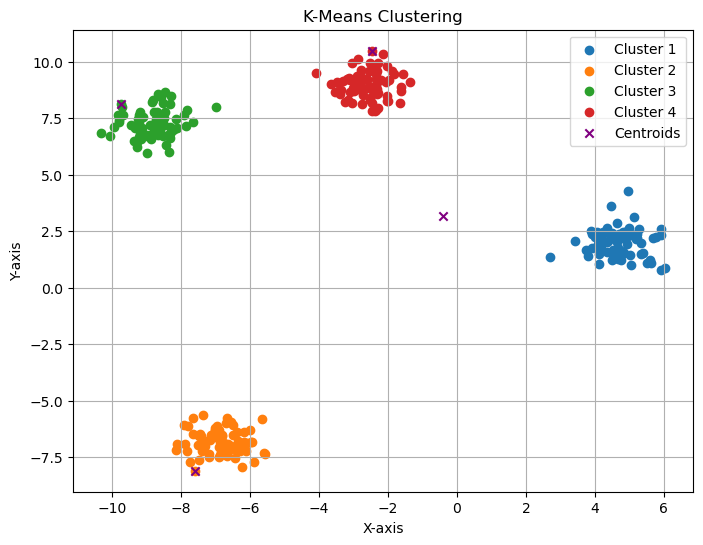

Round #:  1


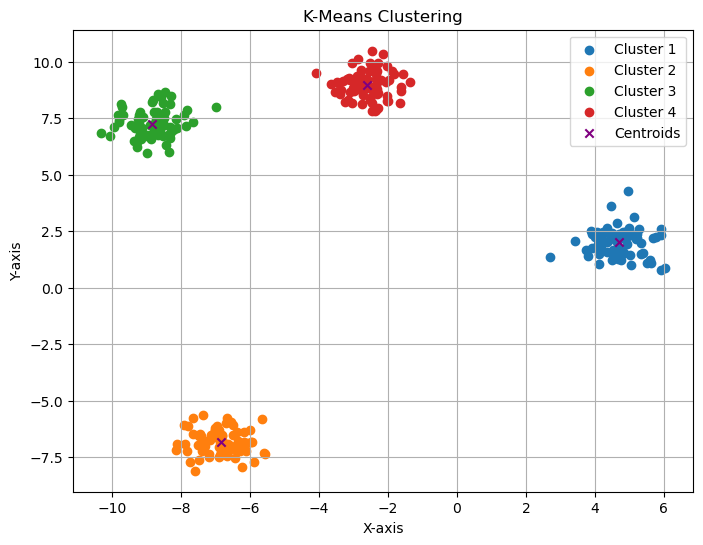

Terminate after round:  2
Round #:  2


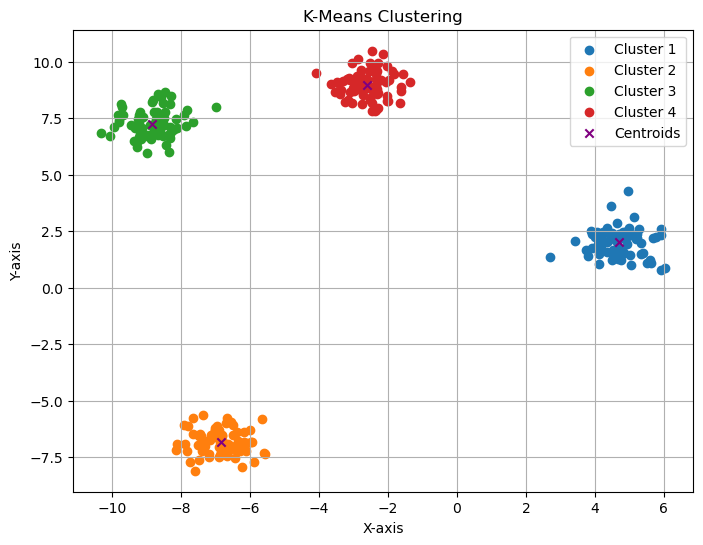

In total ran these many rounds:  3


(array([[ 4.68687447,  2.01434593],
        [-6.85126211, -6.85031833],
        [-8.83456141,  7.24430734],
        [-2.60516878,  8.99280115]]),
 [[array([4.74378739, 2.20436011]),
   array([3.92509674, 2.36710185]),
   array([4.85408813, 1.55742393]),
   array([3.42479328, 2.08504227]),
   array([5.33503618, 1.48076029]),
   array([4.10617018, 1.48368351]),
   array([3.99734334, 2.26265313]),
   array([4.76833508, 1.22572642]),
   array([5.40002553, 1.548568  ]),
   array([4.34866071, 2.02229417]),
   array([5.59148893, 1.23048038]),
   array([4.94890745, 4.28480858]),
   array([5.21790451, 2.22083824]),
   array([4.70798924, 2.37044809]),
   array([5.91969886, 0.801917  ]),
   array([5.17963876, 2.1575494 ]),
   array([4.92382141, 1.92947234]),
   array([5.75934354, 2.25746944]),
   array([5.69915138, 2.21615871]),
   array([3.81327722, 1.41047466]),
   array([4.35491165, 1.58117214]),
   array([4.85455125, 2.3096404 ]),
   array([4.51500549, 1.67736912]),
   array([5.05163495, 1.00

In [170]:
k_means(X, 4, plot = True, plusplus = True)

### Fit and Plot with Seed = 2

Round #:  0


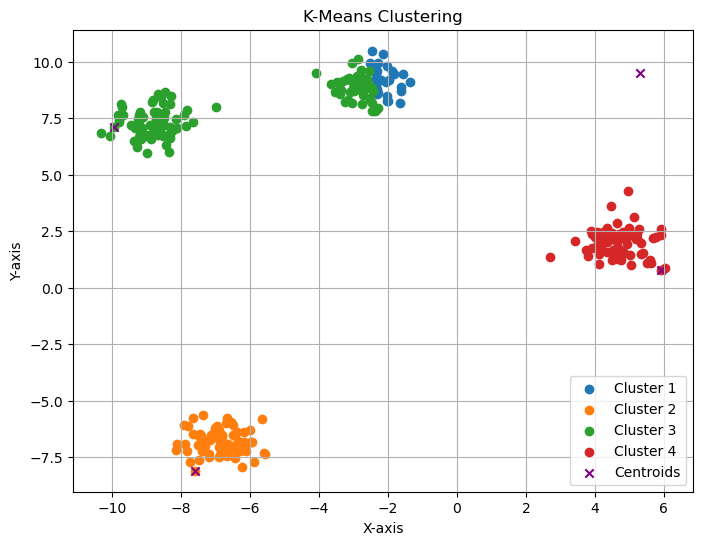

Round #:  1


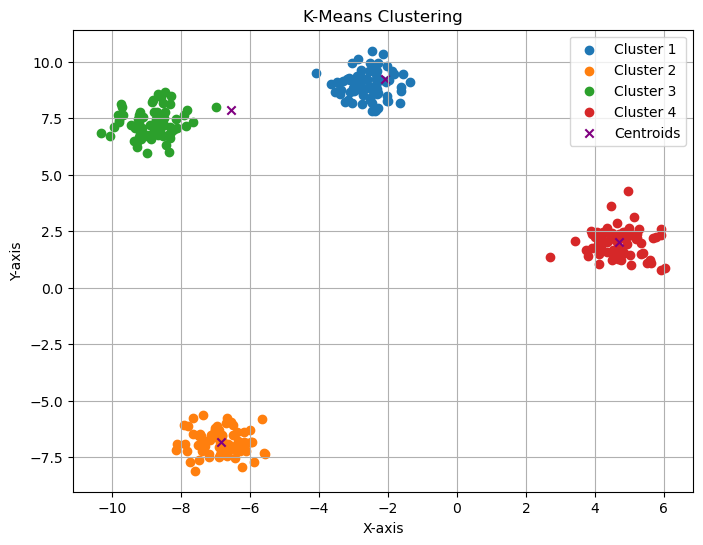

Round #:  2


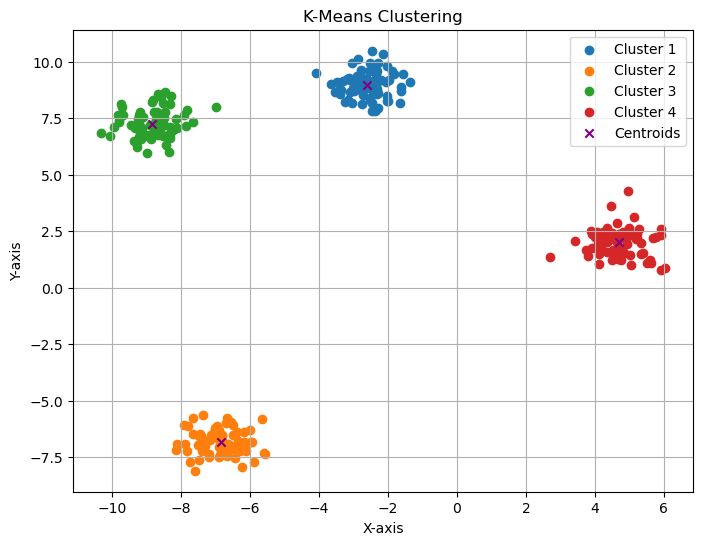

Terminate after round:  3
Round #:  3


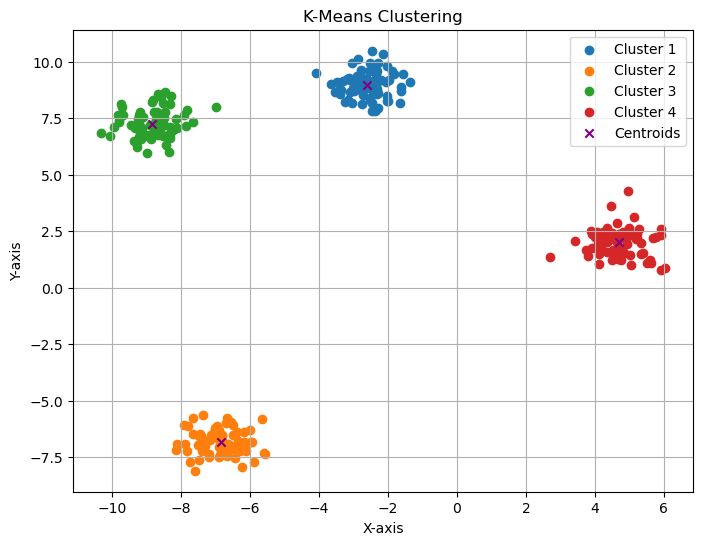

In total ran these many rounds:  4


(array([[-2.60516878,  8.99280115],
        [-6.85126211, -6.85031833],
        [-8.83456141,  7.24430734],
        [ 4.68687447,  2.01434593]]),
 [[array([-2.01567068,  8.28177994]),
   array([-2.79670217,  8.90289074]),
   array([-2.87022159, 10.12565304]),
   array([-2.38387947,  7.83848405]),
   array([-3.35842007,  8.76189893]),
   array([-2.93042948,  8.81768884]),
   array([-2.45095109,  9.59547312]),
   array([-2.15708337, 10.3285595 ]),
   array([-2.60596905,  9.25671664]),
   array([-2.78724824,  8.73484828]),
   array([-3.10351942,  8.67450749]),
   array([-2.37272166,  9.79857178]),
   array([-2.35466739,  8.96961858]),
   array([-2.53002468,  8.31307931]),
   array([-2.29236026,  9.93710807]),
   array([-1.6224612,  8.703324 ]),
   array([-2.78558089,  9.64855946]),
   array([-3.14657985,  9.29844159]),
   array([-2.74446251,  8.13617716]),
   array([-2.86958084,  8.83926988]),
   array([-3.1168963 ,  9.20283453]),
   array([-2.5524037 ,  9.61640587]),
   array([-2.3104395

In [171]:
k_means(X, 4, seed = 2, plot = True, plusplus = True)

### Test on RGB Image

In [160]:
# first lets load the image + flatten the rgb channels 

# Open the image file
image = Image.open("cropped.jpg")  # Replace "your_image.jpg" with the path to your image file

# Convert the image to RGB mode (in case it's grayscale or other mode)
image = image.convert("RGB")

# Convert the image to a NumPy array
image_array = np.array(image)

# Display the shape of the image array (height, width, channels)
print("Image shape:", image_array.shape)

pixels = image_array.reshape(-1, 3)
# Meaning that there are 260100 pixels in total for the resolution 
print("Pixels shape:", pixels.shape) 

Image shape: (510, 510, 3)
Pixels shape: (260100, 3)


In [213]:
#Now lets actually run these values through the k means cluster. 
#think of each color channel as a new dimension in space 
k = 6
results = k_means(pixels, k, seed = None, epsilon = 0.01, plot=False, plusplus = True, iteration = 5)

This is round  1  and my centroids are  [[ 47.46787786 169.06567841  13.74958176]
 [213.35211268 186.64788732 196.38028169]
 [151.24264084  74.08021418  65.3998924 ]
 [ 24.1759846   17.62813116  14.62298811]
 [158.66892686 135.65680726 128.57981847]
 [ 96.37304614  60.87649442  54.18071337]]
This is round  2  and my centroids are  [[ 47.46787786 169.06567841  13.74958176]
 [186.87731481 173.70833333 173.73148148]
 [147.19078254  76.91719531  68.35840936]
 [ 25.0167785   18.1193566   15.12406331]
 [156.60283551 131.97246468 124.59666297]
 [ 94.42692756  55.32994687  48.48653622]]
This is round  3  and my centroids are  [[ 47.46787786 169.06567841  13.74958176]
 [175.76045488 162.09317682 157.30741012]
 [145.05539671  76.8908464   68.41697851]
 [ 24.64713815  17.95736404  14.97102492]
 [154.33267327 128.21846401 120.58956382]
 [ 91.3593678   52.46135495  45.79174235]]
Terminate after round:  4
This is round  4  and my centroids are  [[ 47.46787786 169.06567841  13.74958176]
 [172.3175206

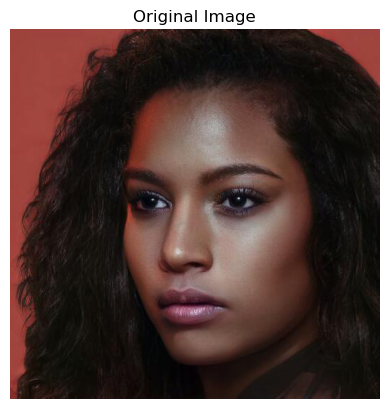

In [191]:
#plot the original image 
plt.imshow(image_array)
plt.title('Original Image')
plt.axis('off')  # Turn off axis labels
plt.show()

60968


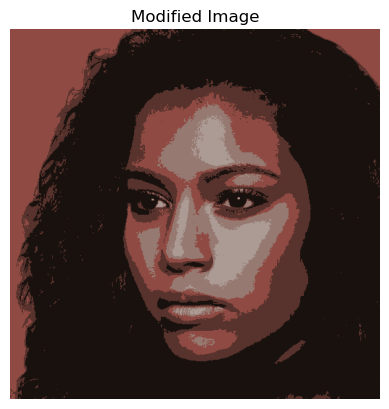

In [214]:
#plot the new image using colors from the k means clusters 
#results[0] is going to be the centroids while the other results[1] will be the assignments 
print(results[1][1][0]) #displays the index of the pt that is assigned to cluster 1 (2nd cluster)

modified_image_array = np.copy(image_array)



for i, row in enumerate(results[1]):
    color = results[0][i]
    for loc in row: #location encodes information about the pixel 
        yloc = loc // image_array.shape[0]  
        xloc = loc % image_array.shape[1]
        modified_image_array[yloc, xloc] = color
        

# Plot the modified image
plt.imshow(modified_image_array)
plt.title('Modified Image')
plt.axis('off')  # Turn off axis labels
plt.show()

### Compare Results from Different Methods and Seeds 

# Hierarchical

In [228]:
#load the hierarchical data to be parsed 

customers = pd.read_csv("Mall_Customers.csv")

print(type(customers)) #customers is a dataframe 

#CustomerID, Gender, Age, Annual Income, Spending Score 
#200 entries, 5 attributes for each entry 
print(customers.shape)

#hierarchical clustering does not deal with shape assumptions. 
#but needs to be stopped at a certain point + that requires mental inspection to find the optimal point 

#encode gender as 0 or 1 depending on gender. 0 being male 1 being female 
customers['Gender'] = customers['Gender'].map({'Male': 0, 'Female': 1})
customers = customers.drop(columns=['CustomerID'])

print(customers)

#the idea is to imagine these data points in 4 dimensional space, then cluster that way 
#then we can predict spending score as the other variables change 

customers = customers.to_numpy()
print(customers)

<class 'pandas.core.frame.DataFrame'>
(200, 5)
     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         0   19                  15                      39
1         0   21                  15                      81
2         1   20                  16                       6
3         1   23                  16                      77
4         1   31                  17                      40
..      ...  ...                 ...                     ...
195       1   35                 120                      79
196       1   45                 126                      28
197       0   32                 126                      74
198       0   32                 137                      18
199       0   30                 137                      83

[200 rows x 4 columns]
[[  0  19  15  39]
 [  0  21  15  81]
 [  1  20  16   6]
 [  1  23  16  77]
 [  1  31  17  40]
 [  1  22  17  76]
 [  1  35  18   6]
 [  1  23  18  94]
 [  0  64  19   3]
 [  1  30  19  72]
 [  0  

### Implement Ward Distance

In [268]:
def ward_distance(X, clusters, ptsA, ptsB): #gives the id of the clusters 
    clusterA, centroidA, distanceA = clusters[ptsA][3]
    clusterB, centroidB, distanceB = clusters[ptsB][3]
    
    # find the pts within these clusters
    combined = clusterA + clusterB
    
    # find the centroid 
    newcentroid = [(len(clusterA) * centroidA[i] + len(clusterB) * centroidB[i]) 
                   /(len(clusterA) + len(clusterB)) for i in range(len(centroidA))]
                
    # find the distance to the new centroid 
    distances = sum(np.linalg.norm(newcentroid - X[pt]) for pt in combined)
    
    # subtract the distance to original clusters 
    ward = math.sqrt(2 * (distances - distanceA - distanceB))
    
    # return the distance 
    return (ward, distances, newcentroid)

### Implement Hierachical Clustering

In [303]:
def hierarchical(X): 
    #receive a numpy object, then give a list of values which are clusters
    #matrix.append([clusterA_id, clusterB_id, ward_dist, 0]) 
    #The last one should store:
    #1. points 
    #2. the centroid information 
    #3. the distance to the centroid 
    
    clusters = [[i, i, 0., [[i], X[i], 0.]] for i in range(len(X))]
    seen = {i for i in range(len(clusters))}
    
    heap = []
    
    #seed with initial values 
    for i in range(len(clusters)):
        for j in range(i + 1, len(clusters)):
            ward, distance, newcentroid = ward_distance(X, clusters, i, j)
            heapq.heappush(heap, (ward, distance, newcentroid, i, j))
            
    #take the minimum combined, decrement set, increment set, update heap with new values 
    while (len(seen) > 1):
        ward, distance, newcentroid, i, j = heapq.heappop(heap)
        while (not(i in seen and j in seen)):
            #print(ward, distance, newcentroid, i, j)
            ward, distance, newcentroid, i, j = heapq.heappop(heap)       
        
        #decrement set 
        seen.remove(i)
        seen.remove(j)
        
        #update the clusters 
        indices = clusters[i][3][0] + clusters[j][3][0]
        clusters.append([i, j, ward, [indices, newcentroid, distance]])
        ind = len(clusters) - 1
        for val in seen: #iterate thorugh seen and add values 
            ward, distance, newcentroid= ward_distance(X, clusters, val, ind)
            heapq.heappush(heap, (ward, distance, newcentroid, val, ind))
        
        #increment set 
        seen.add(ind) #last value to be added 
        
        #destroy the centroid informations 
        clusters[i][3] = 0.
        clusters[j][3] = 0.
    
    #conversion of the last value into a float 
    last_val = list(seen)[0]
    clusters[last_val][3] = 0.
        
    #conversion of indices into floats 
    clusters = clusters[len(X): ]
    for i in range(len(clusters)):
        clusters[i][0] = float(clusters[i][0])
        clusters[i][1] = float(clusters[i][1])
        
    return clusters 

### Implement Dendrogram

[[65.0, 68.0, 1.4142135623730951, 0.0], [129.0, 131.0, 1.4142135623730951, 0.0], [3.0, 5.0, 1.8612097182041991, 0.0], [48.0, 49.0, 2.0, 0.0], [106.0, 109.0, 2.114742526881128, 0.0], [114.0, 115.0, 2.114742526881128, 0.0], [100.0, 105.0, 2.114742526881128, 0.0], [92.0, 96.0, 2.213363839400643, 0.0], [101.0, 207.0, 2.1086310621148865, 0.0], [147.0, 159.0, 2.213363839400643, 0.0], [133.0, 137.0, 2.3003266337912063, 0.0], [110.0, 204.0, 2.3231304003294406, 0.0], [113.0, 205.0, 2.4075558479062775, 0.0], [156.0, 158.0, 2.449489742783178, 0.0], [13.0, 15.0, 2.449489742783178, 0.0], [83.0, 85.0, 2.449489742783178, 0.0], [117.0, 119.0, 2.449489742783178, 0.0], [60.0, 70.0, 2.514866859365871, 0.0], [16.0, 20.0, 2.514866859365871, 0.0], [79.0, 215.0, 2.553723247901144, 0.0], [150.0, 152.0, 2.5755095769013945, 0.0], [50.0, 56.0, 2.6321480259049848, 0.0], [139.0, 210.0, 2.645782432602662, 0.0], [112.0, 121.0, 2.68534961428265, 0.0], [89.0, 208.0, 2.735070292525019, 0.0], [75.0, 78.0, 2.735564799734

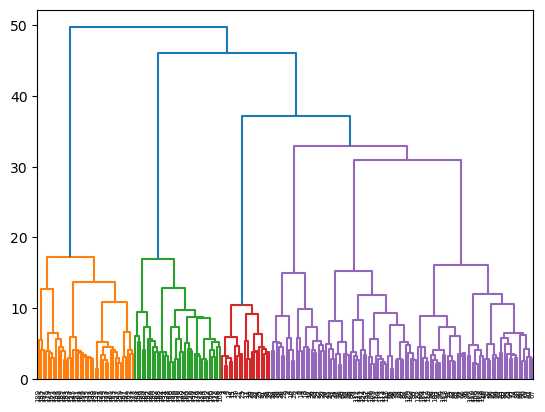

In [304]:
#this contains a little bit of scratch work. tests dendrogram and now it works. 
#conclusions: the last column does not factor into display.
#it can be used to store information on the number of datapoints that is within a cluster, but its optional 
#in addition, you must not connect a node twice. We are making a spanning tree here!! 

cluster = hierarchical(customers)

#print(cluster)

plt.figure()
dn = sch.dendrogram(cluster)


#ytdist = np.array([100])
#Z = sch.linkage(ytdist, 'single')
#print(len(ytdist))
#Z = [[0., 1., 100., 0.], [2., 3., 150., 0.], [5., 4., 200., 0.]] 
#print(Z)
# plt.figure()
# dn = sch.dendrogram(Z)